In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
import pandas as pd

In [2]:
#Parameter Kendaraan
lebar = 2.1
tinggi = 3.57
ca = 0.85
af = 6.37

pi = np.pi

kode = "235/75-R17.5"
jari_jari = 0.4

massa_kosong = 8180
massa_isi = 1020
massa_total = massa_kosong + massa_isi

gearbox = 1
axle = 5.86
final_gr = gearbox * axle
mech_eff = 1

kec_max_kmh = 90
kec_operasi_kmh = 50

kec_max_rpm = final_gr*30*(kec_max_kmh/3.6)/pi/jari_jari
kec_operasi_rpm = final_gr*30*(kec_operasi_kmh/3.6)/pi/jari_jari

t_ramp = 20
accel = kec_max_kmh/3.6/t_ramp

theta = 8
theta_percentage = np.tan(np.radians(theta))

crr = 0.02
cd  = 1.05
rho = 1.25
vw  = 0
g   = 9.81
ca  = 1

const_t         = 908.19
highacc_const_t = 1251.89
wp              = 35
# avg_acc = 0.75
# high_acc_wp     =

v_cruise            = 60
s_cruise            = 200
t_cruise            = s_cruise/v_cruise
cruise_percentage   = 33
pt_cruise           = cruise_percentage/100*p_motor

NameError: name 'p_motor' is not defined

In [ ]:
#Tabel Performansi
v_runres = np.arange(0,121,1)

jumlah_variasi = 10
variasi_array = np.arange(0,jumlah_variasi+1,1)
pengali = variasi_array/jumlah_variasi
gradien = np.full(shape=len(variasi_array),fill_value=theta,dtype=np.int)*pengali

rd = rho/2*af*cd*np.square((v_runres/3.6+vw/3.6))
rg = massa_total*g*np.sin(np.radians(gradien))
rrr = massa_total*crr*g*np.cos(np.radians(gradien))

runres_vehicle = np.array([])
for i in range (0,len(variasi_array)):
    temp = rd+rg[i]+rrr[i]
    runres_vehicle = np.concatenate((runres_vehicle,temp))
runres_vehicle = np.reshape(runres_vehicle,(len(v_runres),len(variasi_array)),order='F')
runres_wheel = runres_vehicle * jari_jari
runres_motor = runres_wheel/final_gr



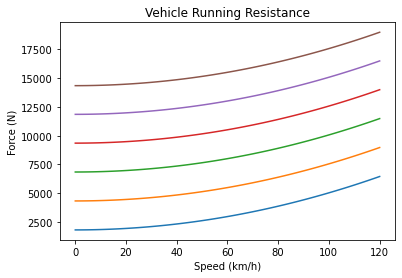

In [ ]:
fig, ax = plt.subplots()
for i in range (0,len(variasi_array)):
    ax.plot(v_runres, runres_vehicle[:,i]);
ax.set(xlabel='Speed (km/h)', ylabel='Force (N)', title='Vehicle Running Resistance');

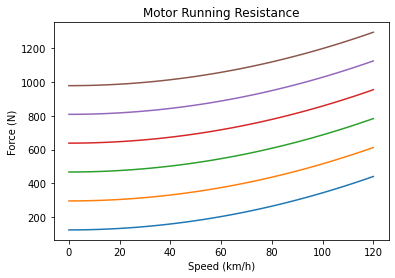

In [ ]:
fig, ax = plt.subplots()
for i in range (0,len(variasi_array)):
    ax.plot(v_runres, runres_motor[:,i]);
ax.set(xlabel='Speed (km/h)', ylabel='Force (N)', title='Motor Running Resistance');

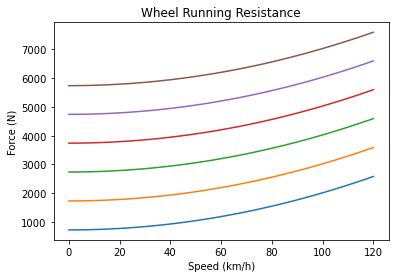

In [ ]:
fig, ax = plt.subplots()
for i in range (0,len(variasi_array)):
    ax.plot(v_runres, runres_wheel[:,i]);
ax.set(xlabel='Speed (km/h)', ylabel='Force (N)', title='Wheel Running Resistance');

In [ ]:
#Hasil kebutuhan traksi
# kec_arr = np.array([0, kec_operasi_kmh, kec_max_rpm])

In [ ]:
#Tractive Effort

# tractive_effort_vehicle = massa_total*accel + runres_vehicle
# tractive_effort_motor   = massa_total*accel + runres_motor
# tractive_effort_wheel   = massa_total*accel + runres_wheel

# Mencari Vehicle Force
const_f = const_t*final_gr/jari_jari*gearbox
v_wp    = wp/3.6
const_p = const_f*v_wp

const_p_real = const_p/(v_runres[1:]/3.6)
const_p_real = np.insert(const_p_real,0,const_p_real[0])
const_f_real = np.full(shape=len(const_p_real),fill_value=const_f,dtype=np.int)

const_fp_real = np.concatenate((const_f_real,const_p_real))
const_fp_real = np.reshape(const_fp_real,(len(const_p_real),2),order='F')

#Tractive Effort
vehicle_force       = const_fp_real.min(axis=1)
wheel_torque        = vehicle_force*jari_jari
motor_torque        = wheel_torque/final_gr/mech_eff
motor_cruise_torque = motor_torque*cruise_percentage/100

vehicle_force_arr = vehicle_force.reshape(vehicle_force.shape[0],-1)
temp = vehicle_force_arr
for i in range (0,5):
    vehicle_force_arr = np.concatenate((vehicle_force_arr,temp),axis=1)
# print ( np.concatenate((,vehicle_force),axis=1))
# print(vehicle_force_arr)

accel_real     = np.subtract(vehicle_force_arr,runres_vehicle)/massa_total

for i in range (len(accel_real)):
    if accel_real[i,0] < 0:
        break
    idx = i

avg_accel_real  = accel_real[:idx,0].mean()
p_motor         = (const_t*mech_eff*final_gr/jari_jari)*(wp/3.6)/1000
highacc_wp = 3.6*p_motor*1000*jari_jari/highacc_const_t/final_gr

#Traffic Effort Peak
const_f_peak = highacc_const_t*final_gr/jari_jari*mech_eff
v_wp_peak    = highacc_wp/3.6
const_p_peak = const_f_peak*v_wp_peak


const_p_peak_real = const_p_peak/(v_runres[1:]/3.6)
const_p_peak_real = np.insert(const_p_peak_real,0,const_p_peak_real[0])
const_f_peak_real = np.full(shape=len(const_p_peak_real),fill_value=const_f_peak,dtype=np.int)

const_fp_peak_real = np.concatenate((const_f_peak_real,const_p_peak_real))
const_fp_peak_real = np.reshape(const_fp_peak_real,(len(const_p_peak_real),2),order='F')

vehicle_force_peak       = const_fp_peak_real.min(axis=1)
wheel_torque_peak        = vehicle_force_peak*jari_jari
motor_torque_peak        = wheel_torque_peak/final_gr/mech_eff
motor_cruise_torque_peak = motor_torque_peak*cruise_percentage/100

print(v_wp_peak)
pd.DataFrame(motor_torque_peak)


7.053035809855497


,0
0,1251.877133
1,1251.877133
2,1251.877133
3,1251.877133
4,1251.877133
...,...
116,274.022845
117,271.680769
118,269.378390
119,267.114706


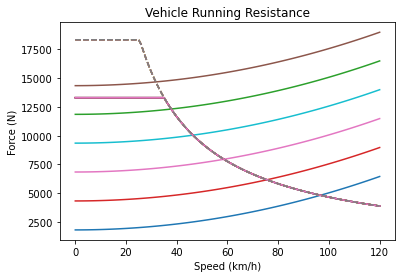

In [ ]:
fig, ax = plt.subplots()
for i in range (0,len(variasi_array)):
    ax.plot(v_runres, runres_vehicle[:,i]);
    ax.plot(v_runres, vehicle_force[:]);
    ax.plot(v_runres, vehicle_force_peak[:],linestyle='--');
ax.set(xlabel='Speed (km/h)', ylabel='Force (N)', title='Vehicle Running Resistance');

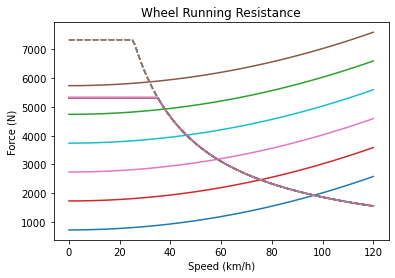

In [ ]:
fig, ax = plt.subplots()
for i in range (0,len(variasi_array)):
    ax.plot(v_runres, runres_wheel[:,i]);
    ax.plot(v_runres, wheel_torque[:]);
    ax.plot(v_runres, wheel_torque_peak[:],linestyle='--');
ax.set(xlabel='Speed (km/h)', ylabel='Force (N)', title='Wheel Running Resistance');

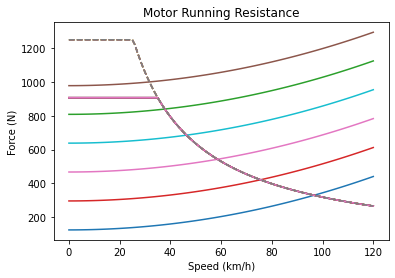

In [ ]:
fig, ax = plt.subplots()
for i in range (0,len(variasi_array)):
    ax.plot(v_runres, runres_motor[:,i]);
    ax.plot(v_runres, motor_torque[:]);
    ax.plot(v_runres, motor_torque_peak[:],linestyle='--');
ax.set(xlabel='Speed (km/h)', ylabel='Force (N)', title='Motor Running Resistance');

In [3]:
#Screen Size
import sys
from PyQt5 import QtWidgets

app = QtWidgets.QApplication(sys.argv)

screen = app.primaryScreen()
print('Screen: %s' % screen.name())
size = screen.size()
print('Size: %d x %d' % (size.width(), size.height()))
rect = screen.availableGeometry()
print('Available: %d x %d' % (rect.width(), rect.height()))

Screen: \\.\DISPLAY1
Size: 1920 x 1080
Available: 1920 x 1030
